# `GGPLOT Basics`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

In [1]:
library(knitr)
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
sales_no_cancels <- read_csv('SalesDataNoCancels.csv')
head(sales_no_cancels)

Parsed with column specification:
cols(
  InvoiceNo = col_double(),
  StockCode = col_character(),
  Description = col_character(),
  Quantity = col_double(),
  InvoiceDate = col_character(),
  UnitPrice = col_double(),
  CustomerID = col_double(),
  Country = col_character(),
  CanceledQty = col_double(),
  Matches = col_logical()
)



InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty,Matches
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
563614,23345,DOLLY GIRL BEAKER,200,8/18/2011 8:51,1.08,12415,Australia,1,FALSE
568708,23391,I LOVE LONDON MINI BACKPACK,4,9/28/2011 15:41,4.15,12393,Australia,1,FALSE
556917,22418,10 COLOUR SPACEBOY PEN,48,6/15/2011 13:37,0.85,12415,Australia,1,FALSE
543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2/15/2011 9:52,0.55,12415,Australia,1,FALSE
547659,20984,12 PENCILS TALL TUBE POSY,12,3/24/2011 13:05,0.85,12434,Australia,1,FALSE
556917,20984,12 PENCILS TALL TUBE POSY,240,6/15/2011 13:37,0.29,12415,Australia,1,FALSE


In [3]:
# new columns with total price
sales_no_cancels$Tot_P<-sales_no_cancels$Quantity*sales_no_cancels$UnitPrice

# subset data:
sub_sales<-sales_no_cancels[c('Country','Tot_P')]

# remove UK , because it dwarfs these data:
Wo_uk<-sub_sales[!sub_sales$Country=='United Kingdom',]


In [4]:
# Aggregated Country Sales:
country_sales_aggr<-aggregate(Wo_uk$Tot_P, by=list(Category=Wo_uk$Country), FUN=sum)
head(country_sales_aggr)

,Category,x
,<chr>,<dbl>
1,Australia,136919.90
2,Austria,10198.68
3,Bahrain,548.40
4,Belgium,40938.69
5,Brazil,1143.60
6,Canada,3666.38


In [5]:
# Finding Top 12 Items Sold By Sales:
item_sales<-sales_no_cancels %>% 
  group_by(Description) %>% 
  summarise(Sales_Tot = sum(Tot_P))

top_twelve_items_sold<-head(item_sales[order(-item_sales$Sales_Tot),],12)
# top_twelve_items_sold

`summarise()` ungrouping output (override with `.groups` argument)



# GGPLOT: background ideas

+ If you are coming from using `base R` for graphics, understand that `ggplot` focuses on using dataframes instead of vectors for plotting. 
+ Layering is also a distinction and advantage for your plots as well

`--------------------`
+ Using `ggplot()` will initialize your plot 
+ `aes()` : stands for [*aesthetic*] mapping of your variables
    + `There is a note`: `ggplot(df, aes(variable)) instead of ggplot(df, aes(df$variable)))`
    + `aes()`: can be passed to ggplot or to a give layer; by default it is passed to every layer.
    
https://ggplot2.tidyverse.org/reference/aes.html

# Why was this blank?

ggplot, cannot interpret what you meant. Each layer is telling it how to react and what to do. It is based on your input

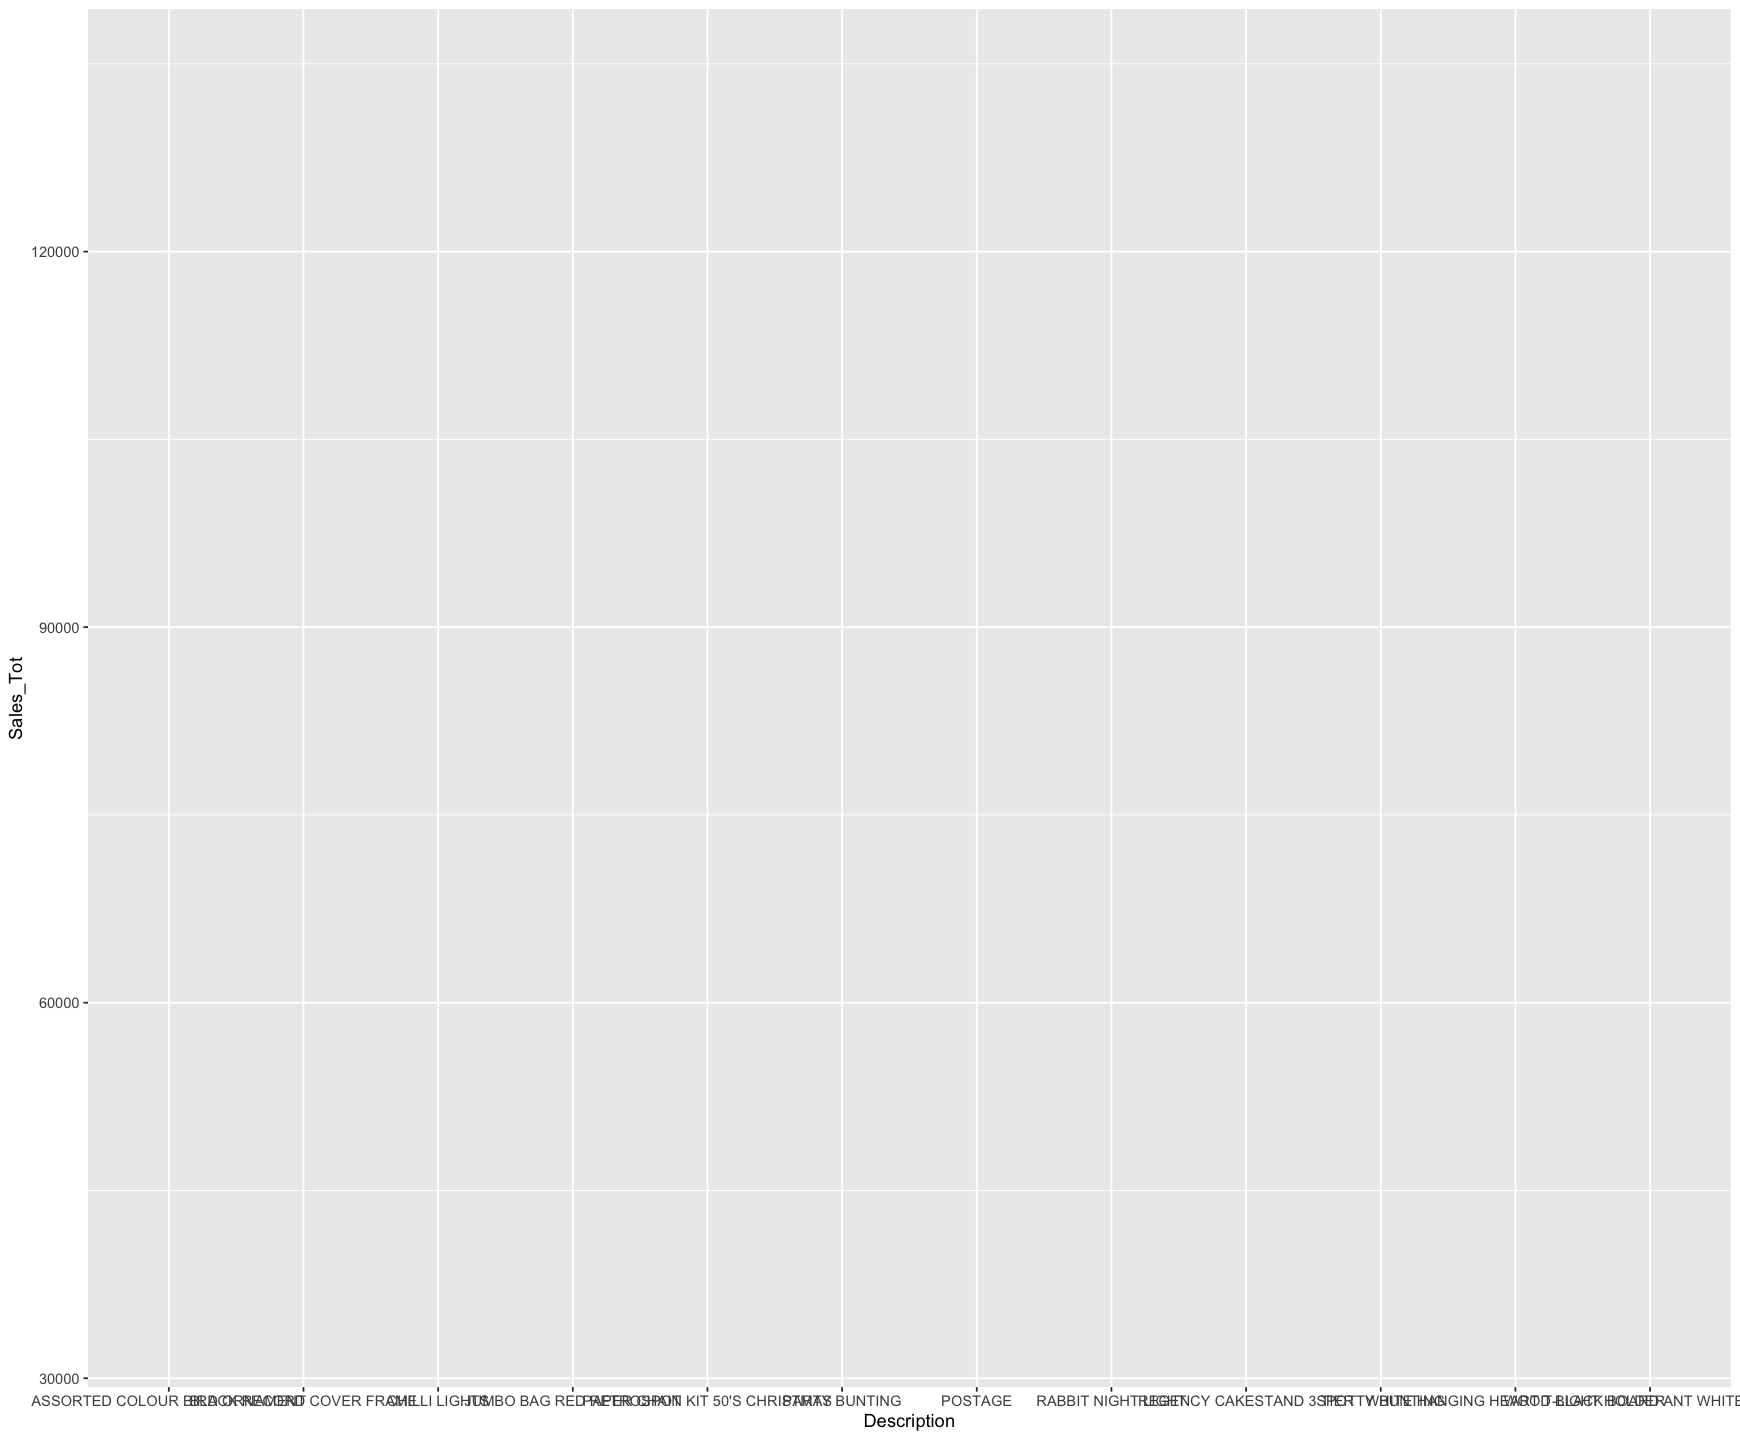

In [86]:
ggplot(top_twelve_items_sold, aes(x=Description, y=Sales_Tot))

In [ ]:
# Lets Get rid of the Scientific notation on the y-axis

options(scipen=999)  # turn off scientific notation i.e 1e+09

ggplot(country_sales_aggr, aes(x=Category, y=x))+ geom_point()

# Now what?

We have our data showing up; but there are a few problems. For simplicity and illustration consider increasing the actual (figure) size. 

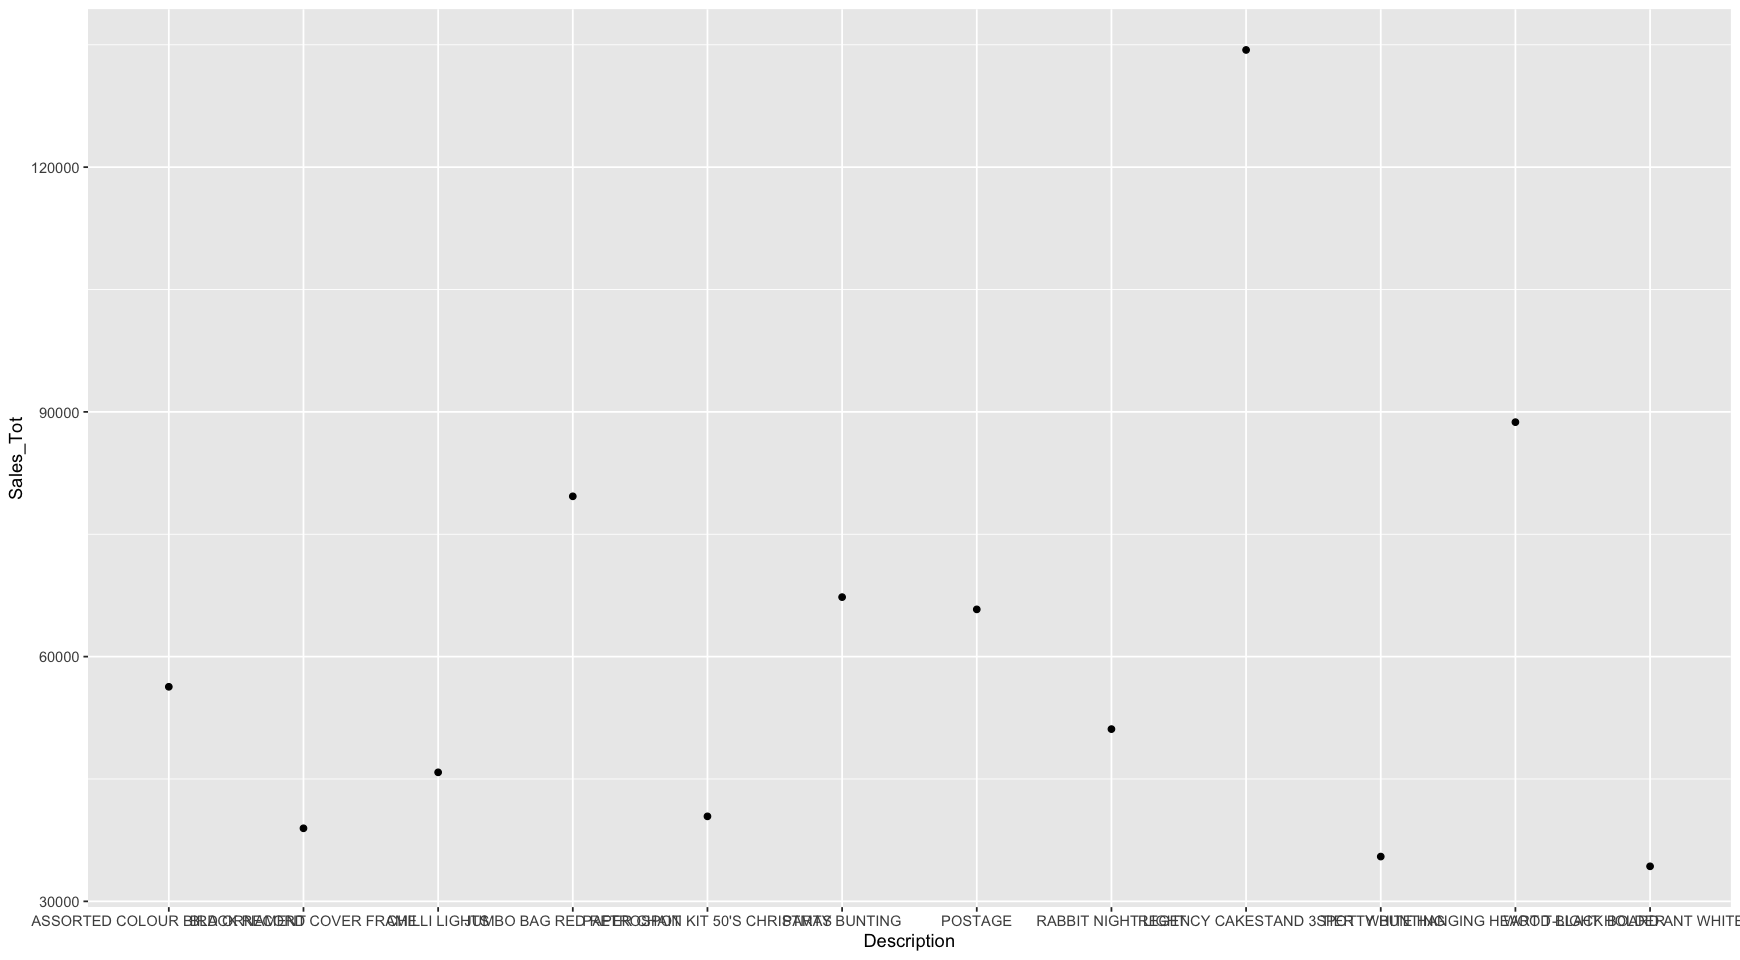

In [8]:
# Add Layer to set plot size:
options(repr.plot.width=14.5, repr.plot.height=8)

ggplot(top_twelve_items_sold, aes(x=Description, y=Sales_Tot)) + geom_point()

# How About `Increasing the Label Sizes` so we don't need magnifying glasses and super powers. 


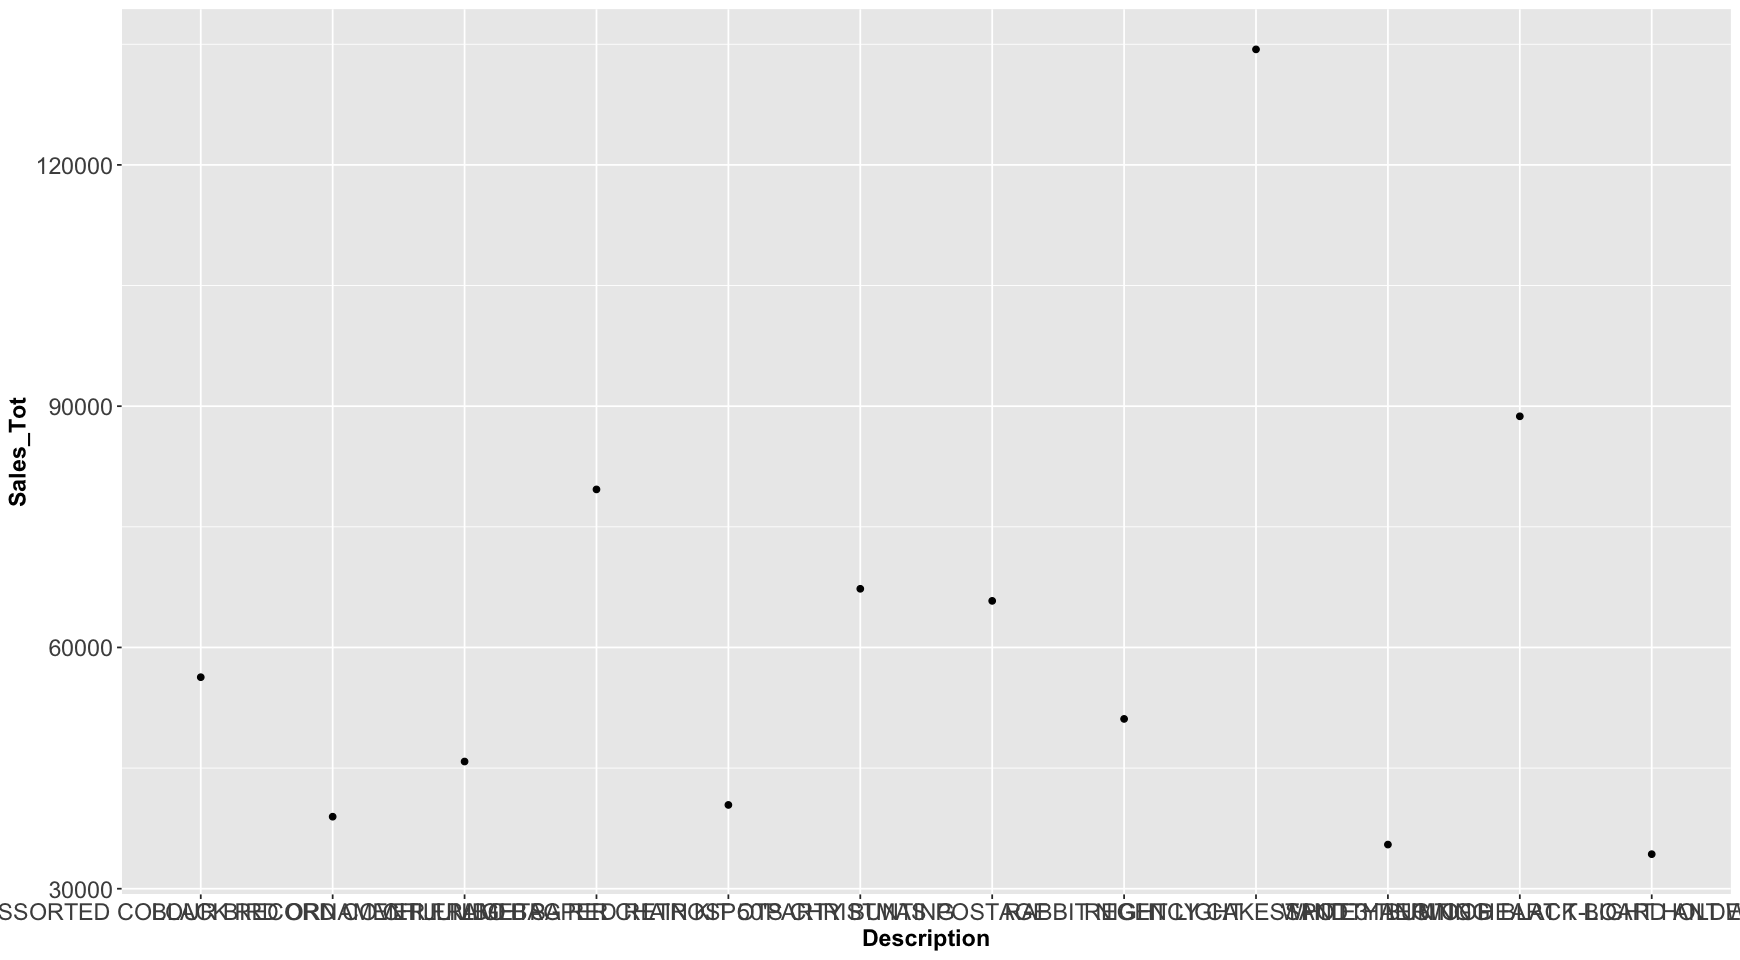

In [12]:
# Add Layer to set plot size:
options(repr.plot.width=14.5, repr.plot.height=8)

ggplot(top_twelve_items_sold, aes(x=Description, y=Sales_Tot)) + geom_point() +
# Increase the axis text
theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"))

# We are getting closer but that x-axis is cluttered:

+ side note: had to adjust height due to new label formatting

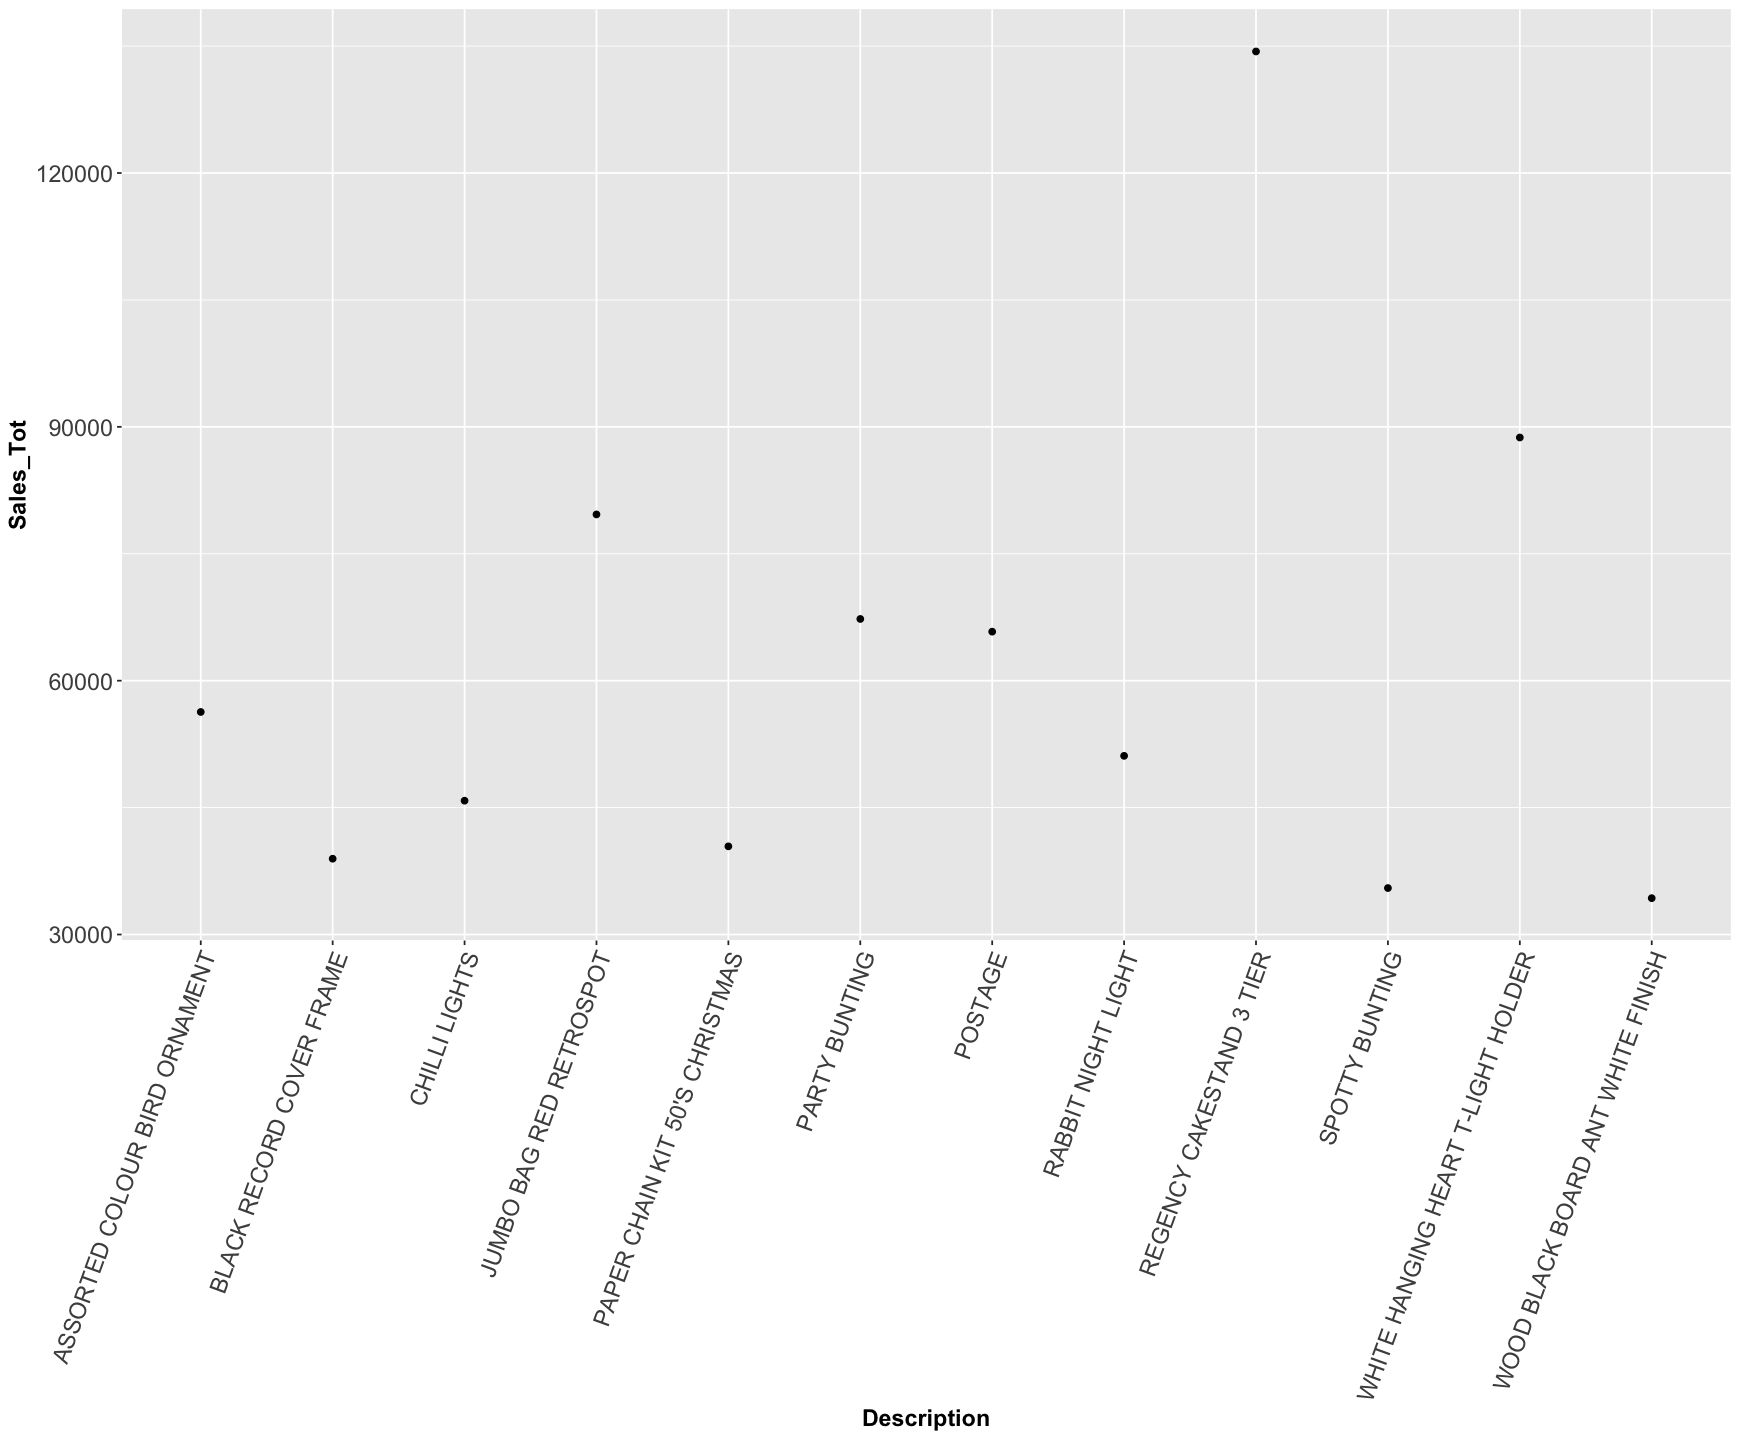

In [28]:
options(repr.plot.width=14.5, repr.plot.height=12)

ggplot(top_twelve_items_sold, aes(x=Description, y=Sales_Tot)) + geom_point() +
# Increase the axis text
theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"))+
# Change Text angle of x-ticks
theme(axis.text.x = element_text(angle = 70, hjust = 1))


# Ok, got a scatter plot need a `Title`, but we can change this to a bar chart considering what we are comparing.

+ Lets store our current data as a variable and work from there

In [53]:
options(repr.plot.width=14.5, repr.plot.height=12)

g_scat<-ggplot(top_twelve_items_sold, aes(x=Description, y=Sales_Tot)) + geom_point() +
# Increase the axis text
theme(axis.text=element_text(size=16),
        axis.title=element_text(size=16,face="bold"))+
# Change Text angle of x-ticks
theme(axis.text.x = element_text(angle = 70, hjust = 1))

# Setting up the Title:

The `title` and `subtitle` are setup using the `labs()` notations where we use a `theme` to tidy up our hot mess. I decide to show a few things: lets change the color, size and align it properly to the center.

+ `hjust`: gives us the ability to shift the labels: 

    + `hjust=0` : plot is placed to the **left**

    + `hjust =0.5` : **center**

    + `hjust=1` : **right**

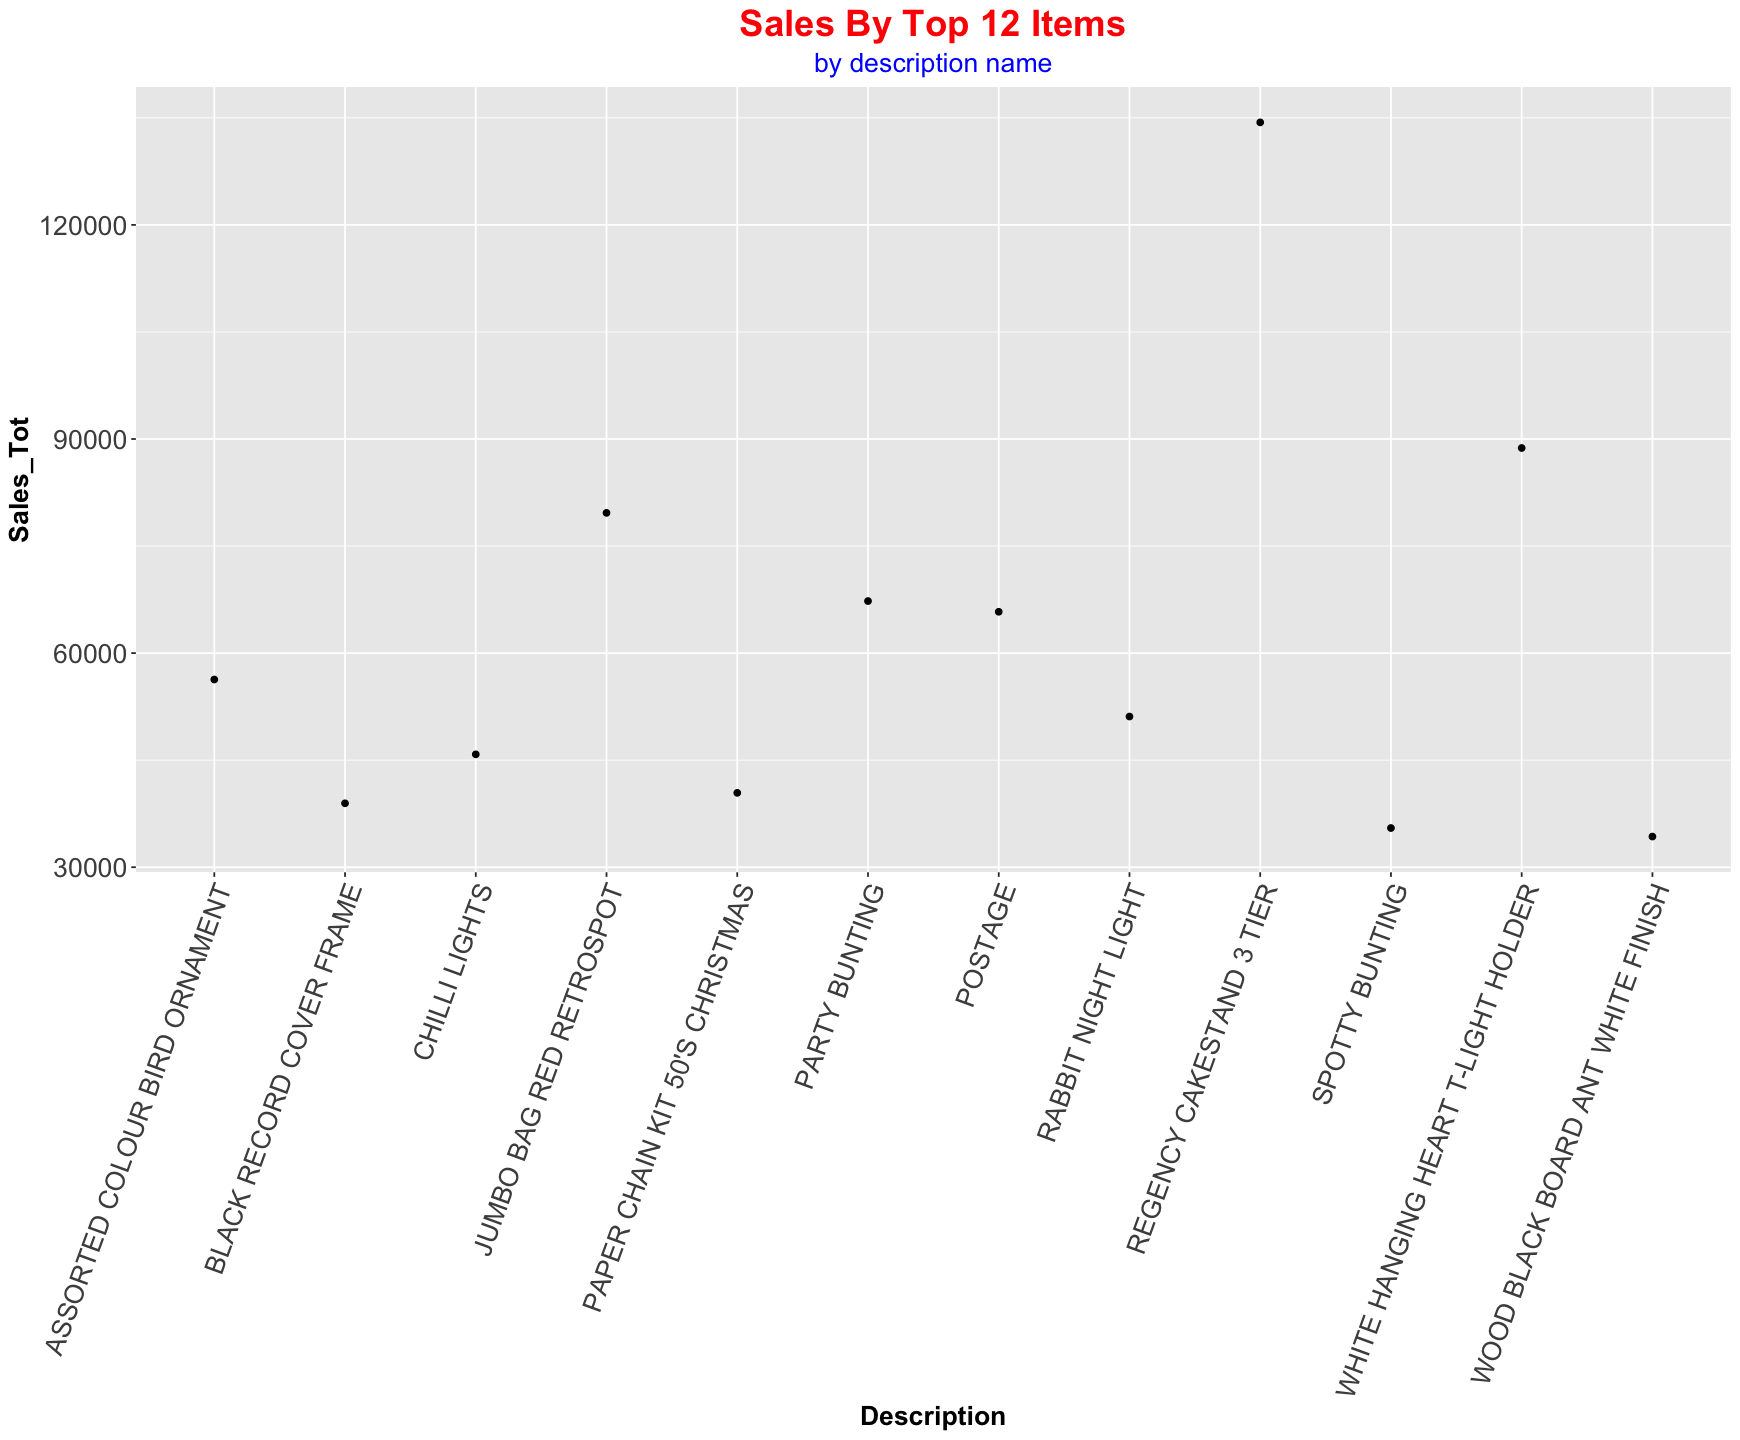

In [54]:
g_scat+ labs(title="Sales By Top 12 Items", 
              subtitle="by description name")+
theme(
  plot.title = element_text(color = "red", size = 22, face = "bold",hjust = .5),
  plot.subtitle = element_text(color = "blue",size=16,hjust=.5))


# What if you want to add highlighting to the axis?

In [62]:
g_almost<-g_scat+ labs(title="Sales By Top 12 Items", 
              subtitle="by description name")+
theme(
  plot.title = element_text(color = "red", size = 22, face = "bold",hjust = .5),
  plot.subtitle = element_text(color = "blue",size=16,hjust=.5))



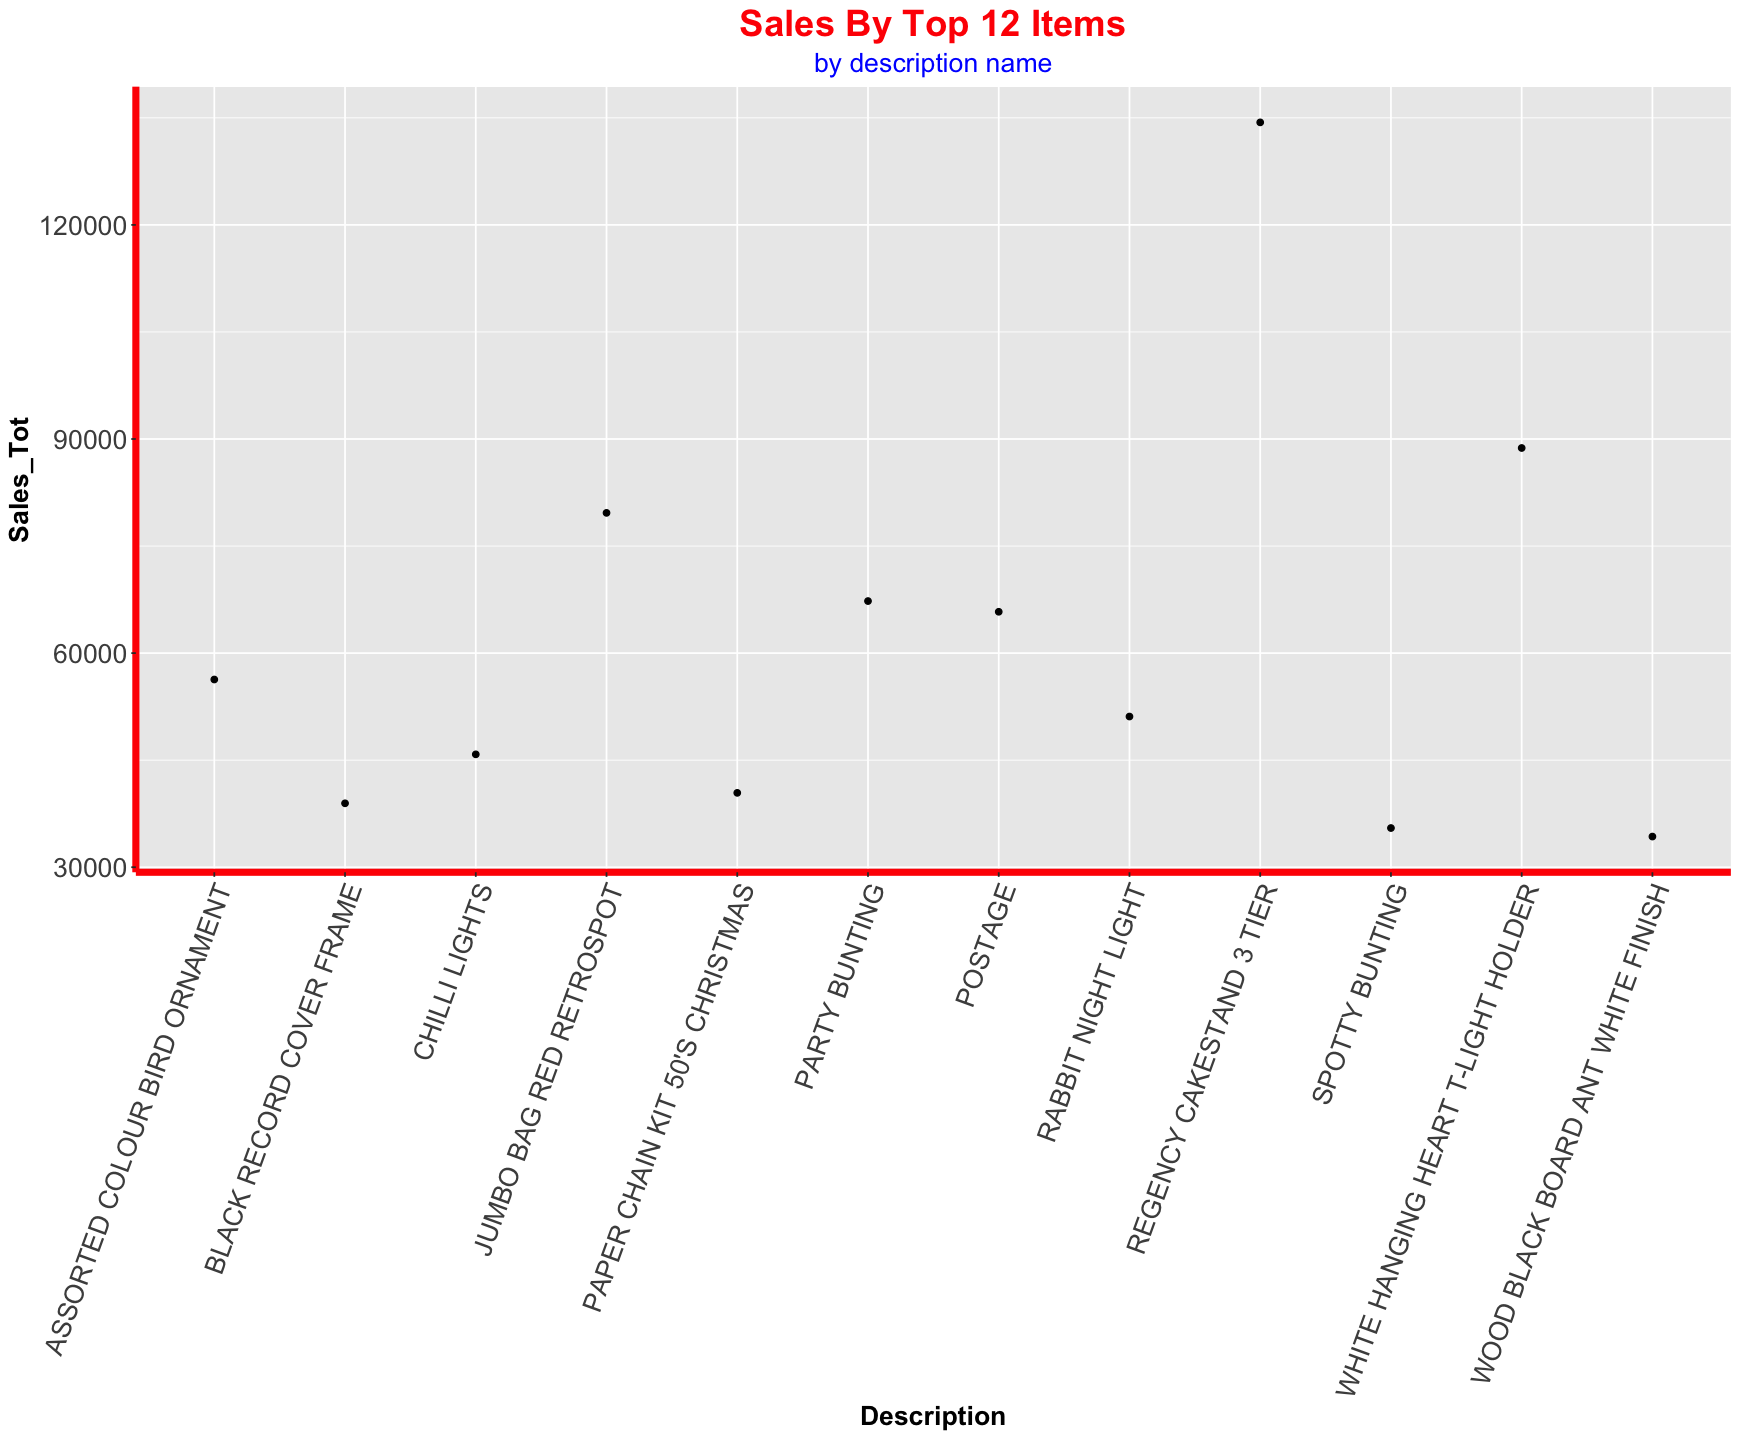

In [63]:
g_almost +
# highlighting the axis
theme(axis.line = element_line(colour = 'red', size = 2))

# Hmm, what else can we play with? 

how about customizing that y-axis label

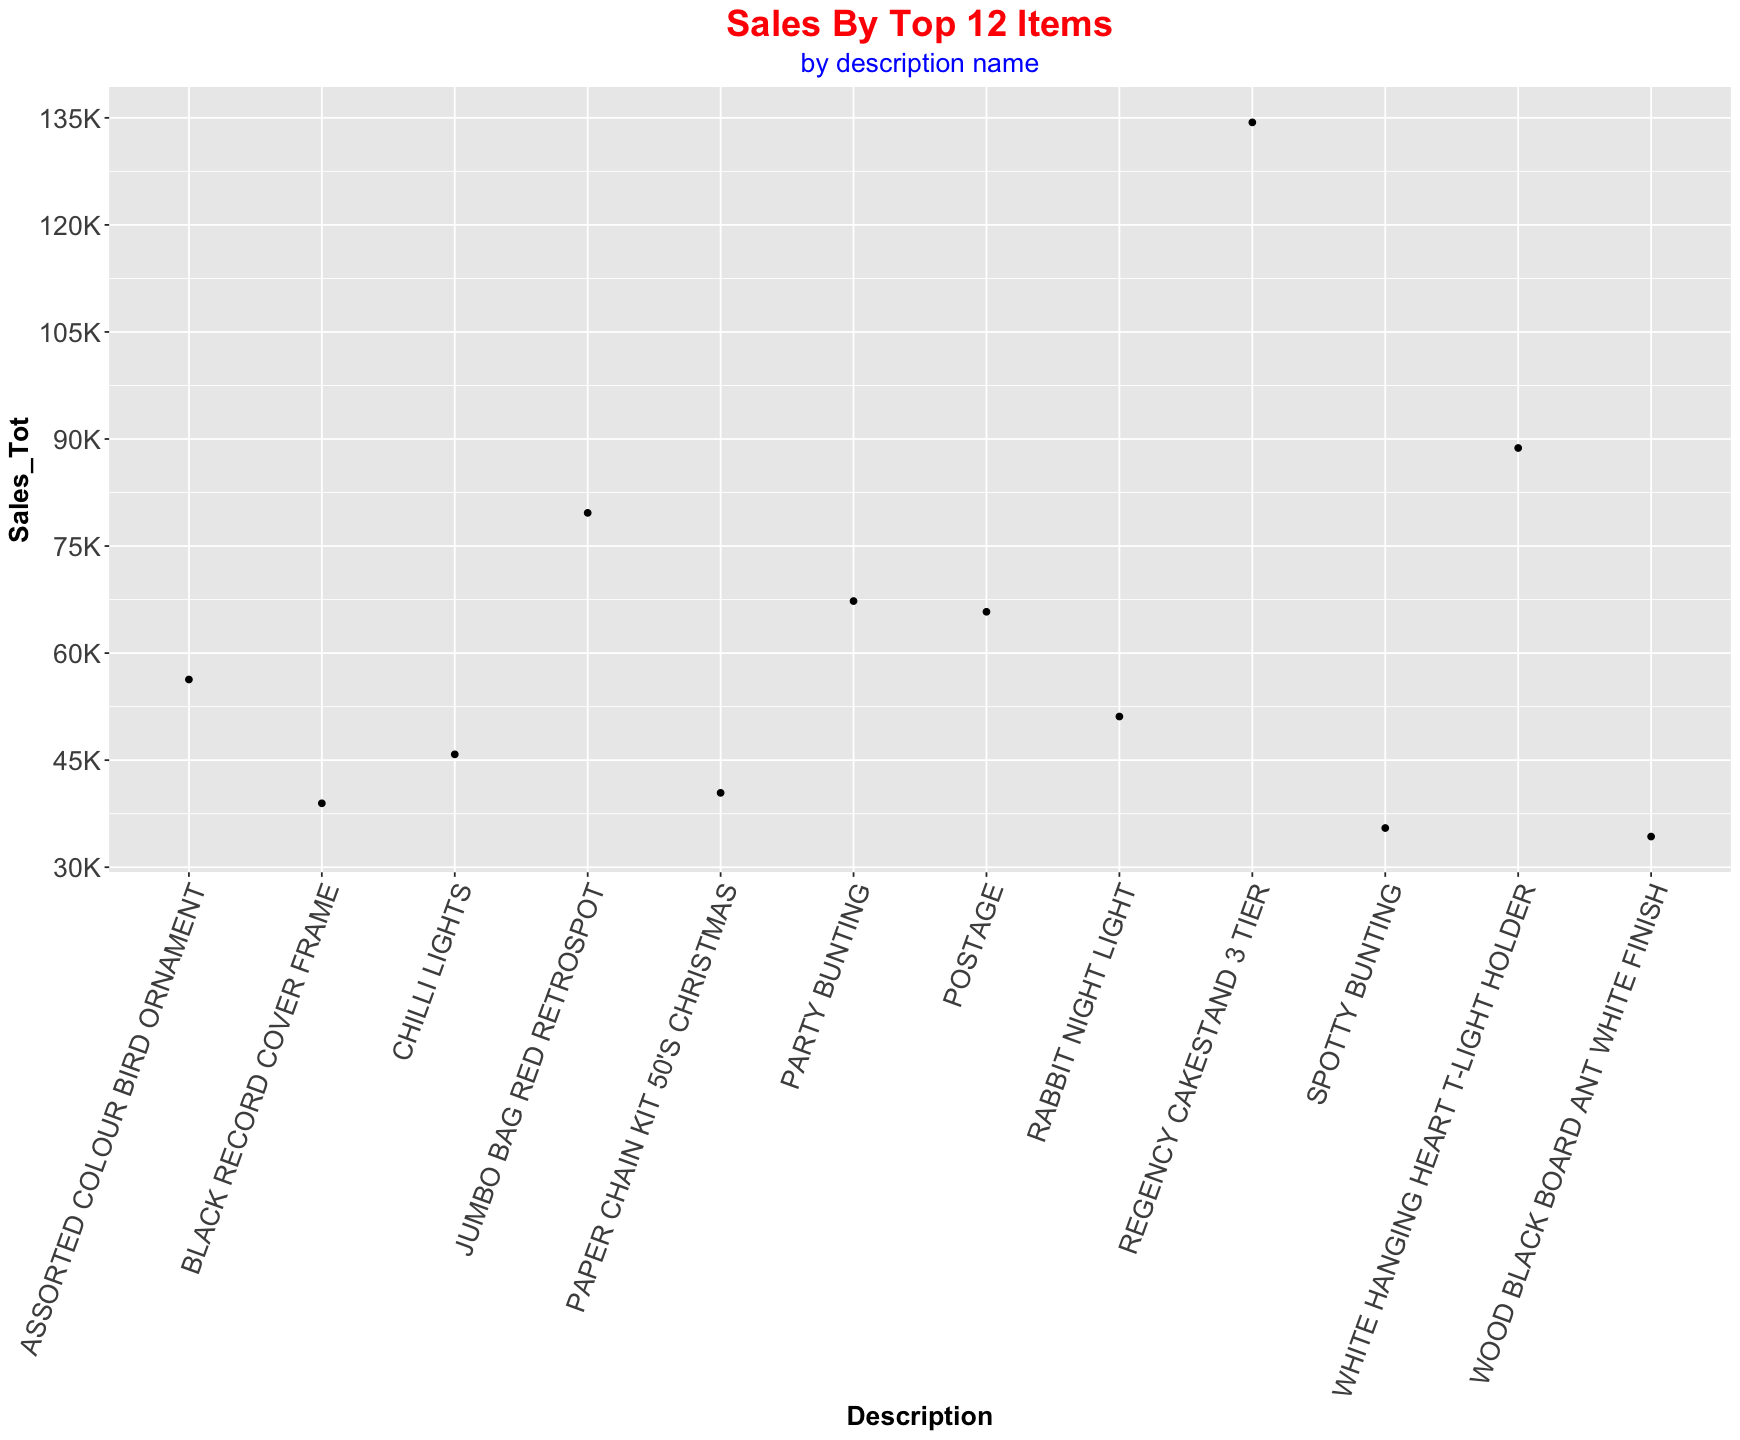

In [68]:
g_almost+ 
scale_y_continuous(breaks=seq(30000, 135000, 15000), labels = function(x){paste0(x/1000, 'K')})


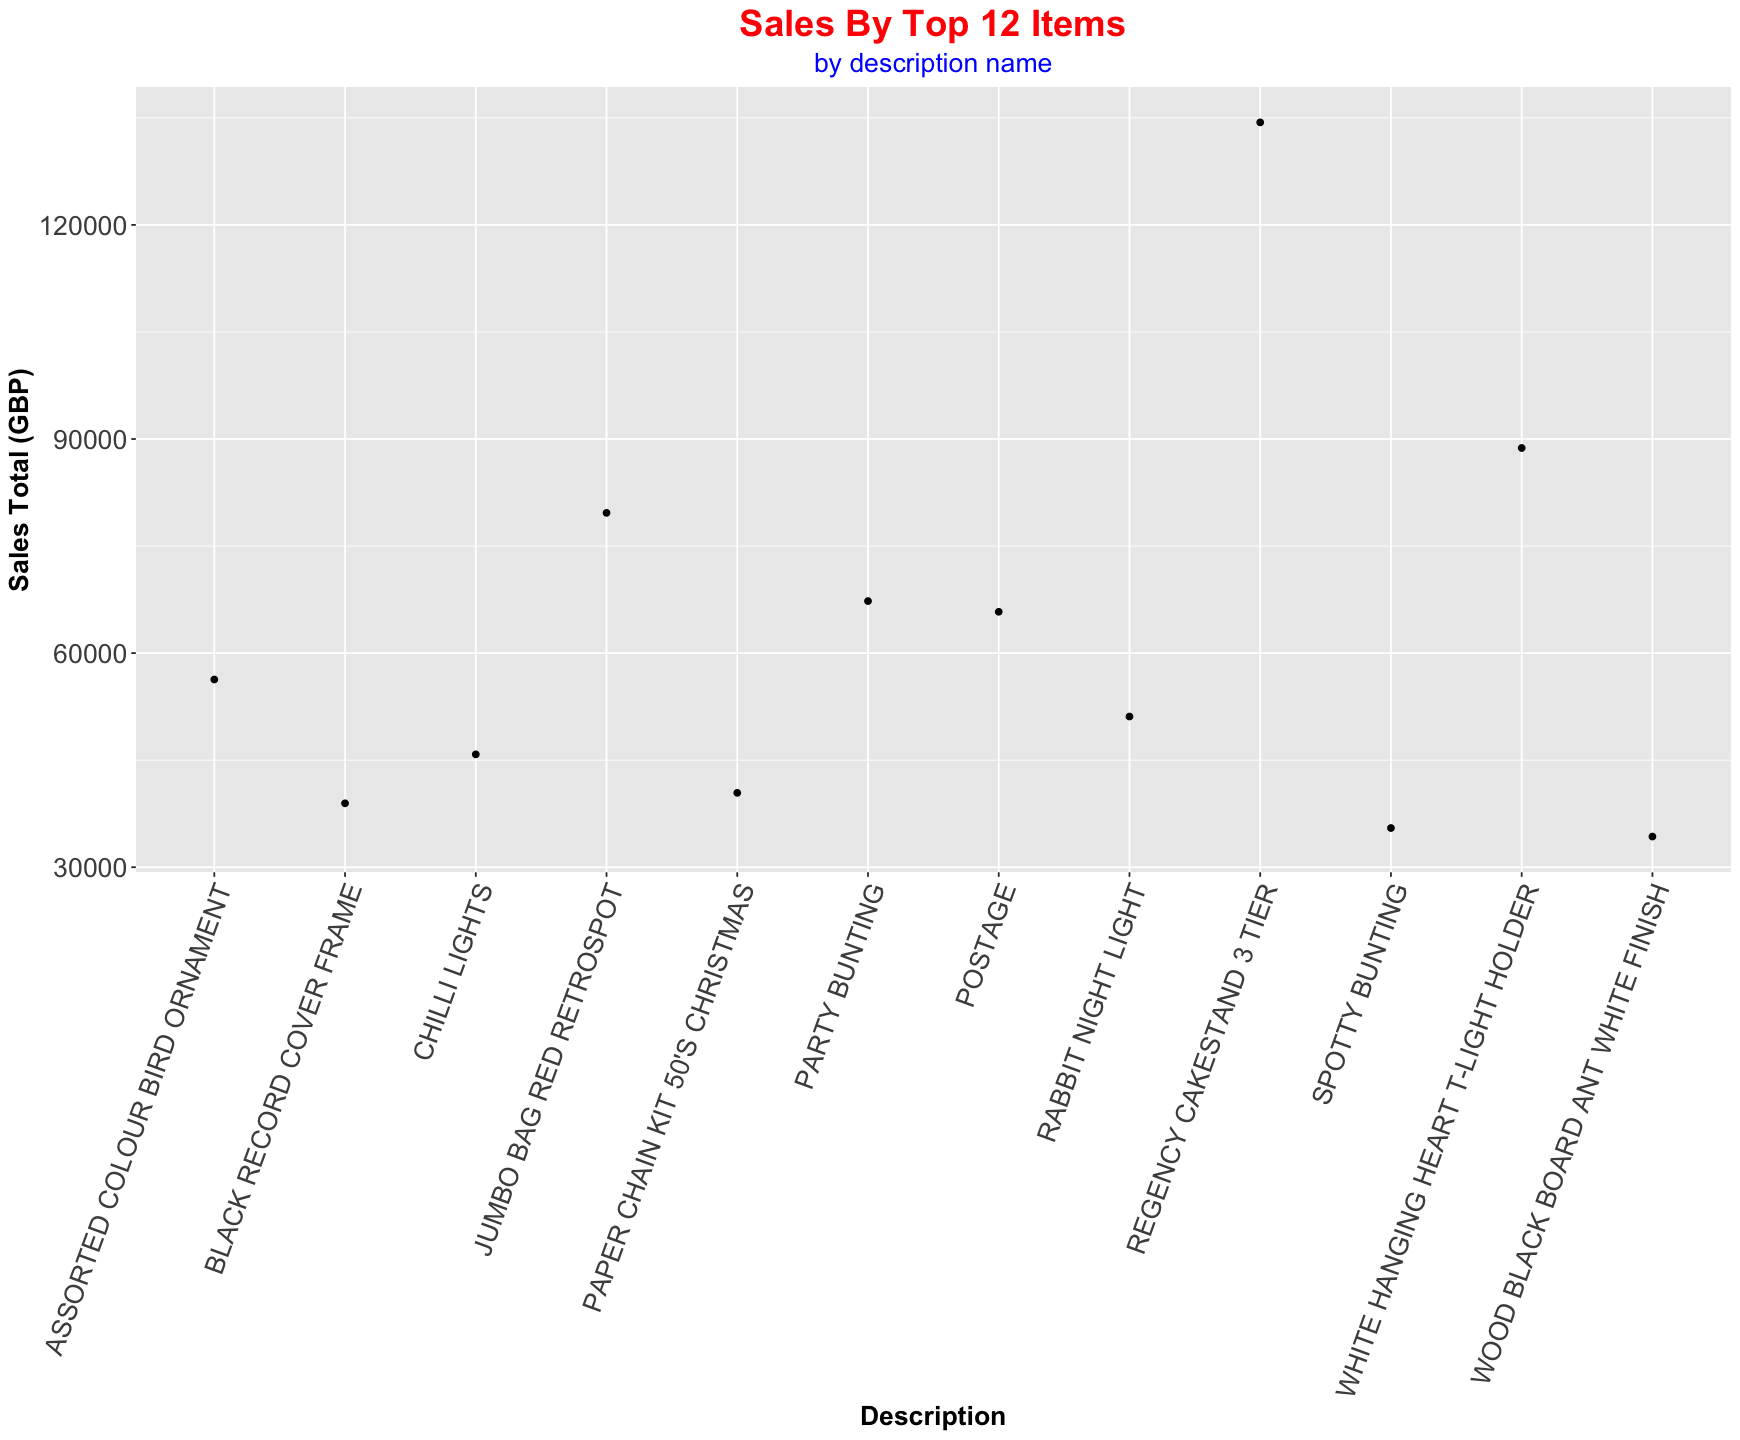

In [73]:
# Add a NEW y-axis Label:

g_almost+ ylab("Sales Total (GBP)")

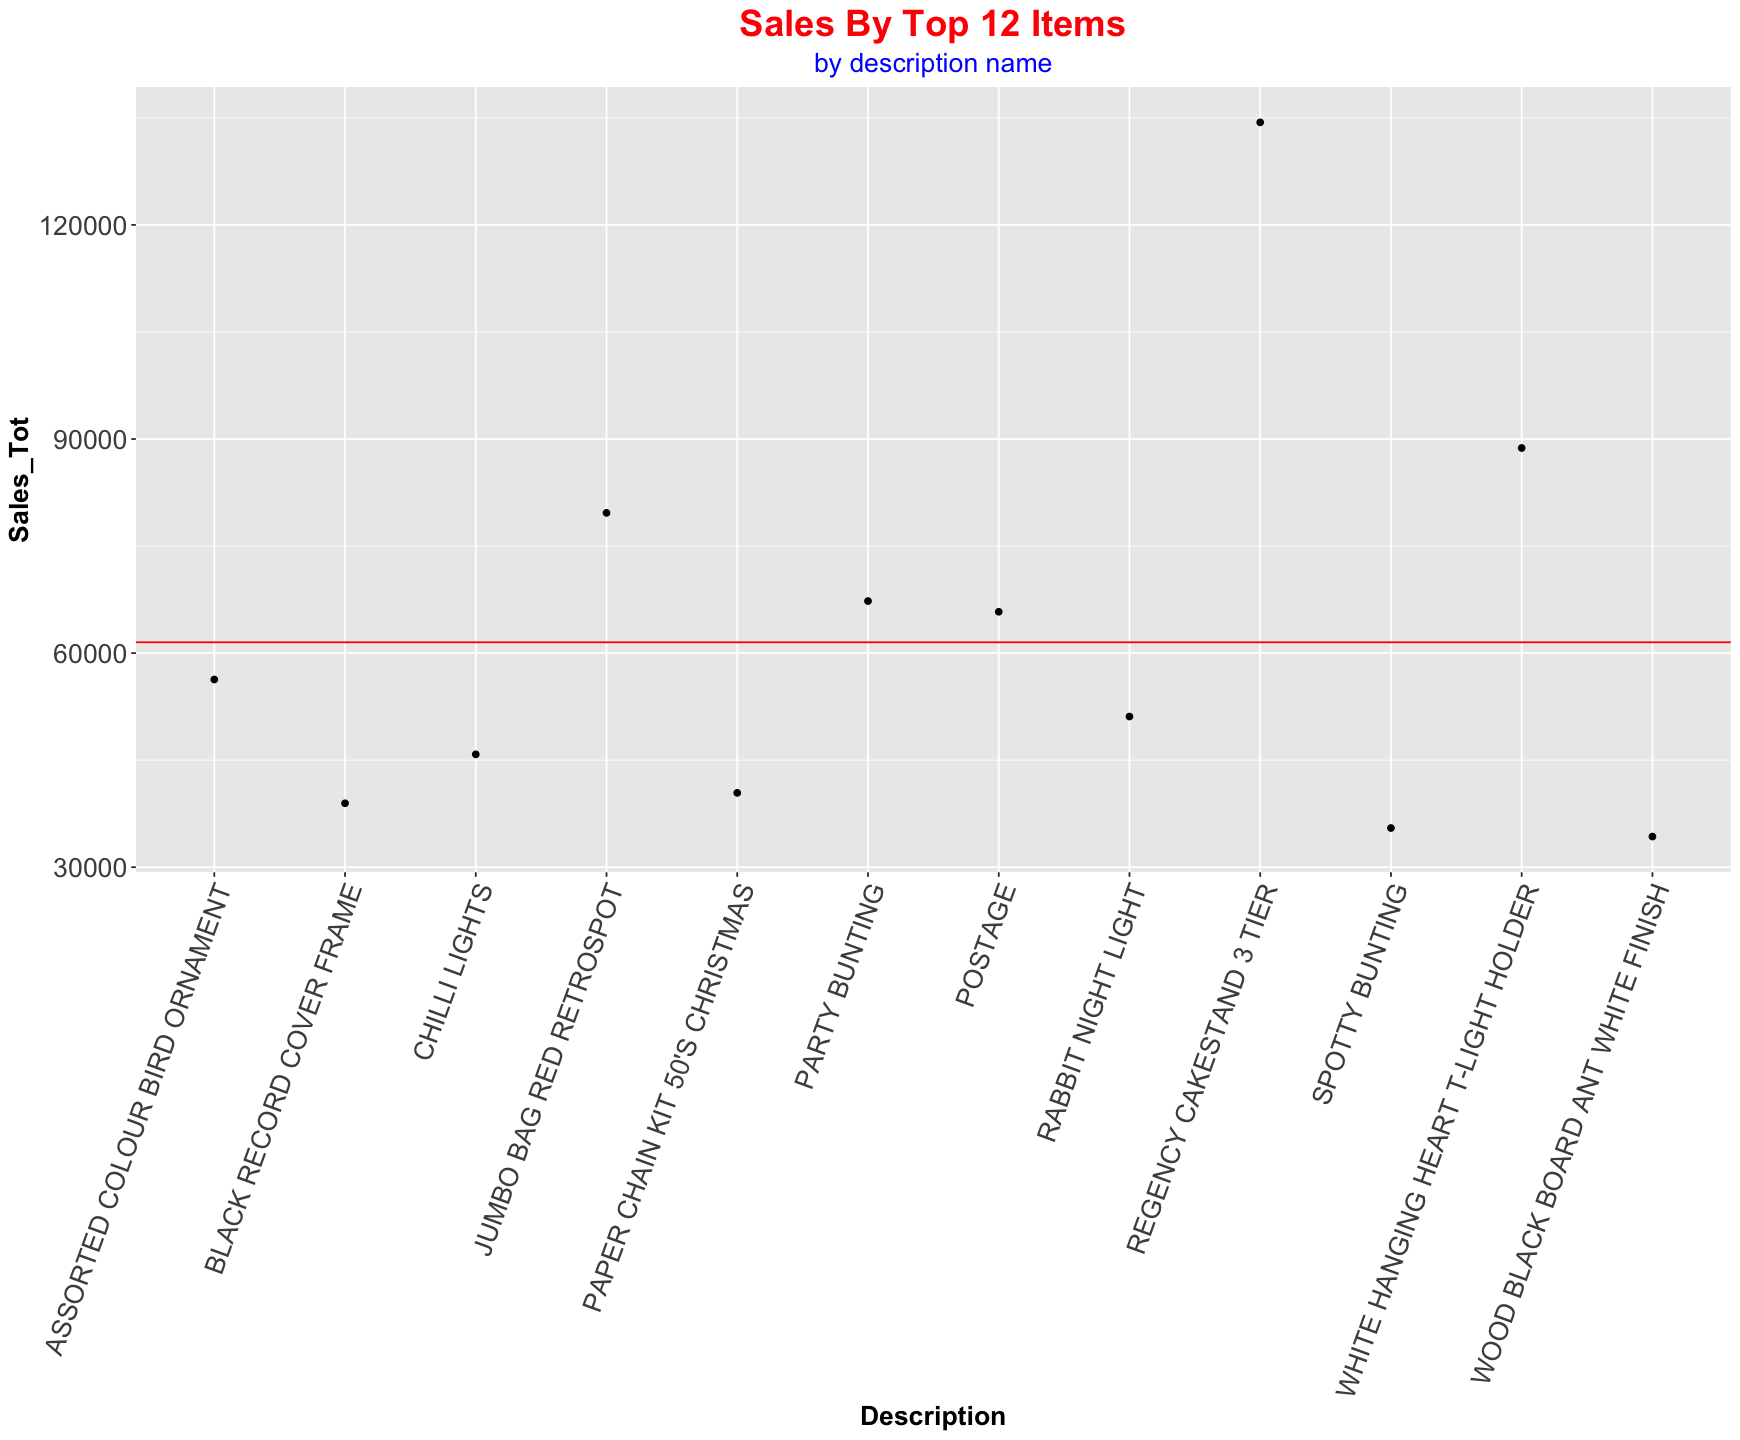

In [76]:
# Add a horizontal line for the mean:

g_almost+
geom_hline(yintercept = mean(top_twelve_items_sold$Sales_Tot),color = "red")

# Lets Do a Bar Plot:

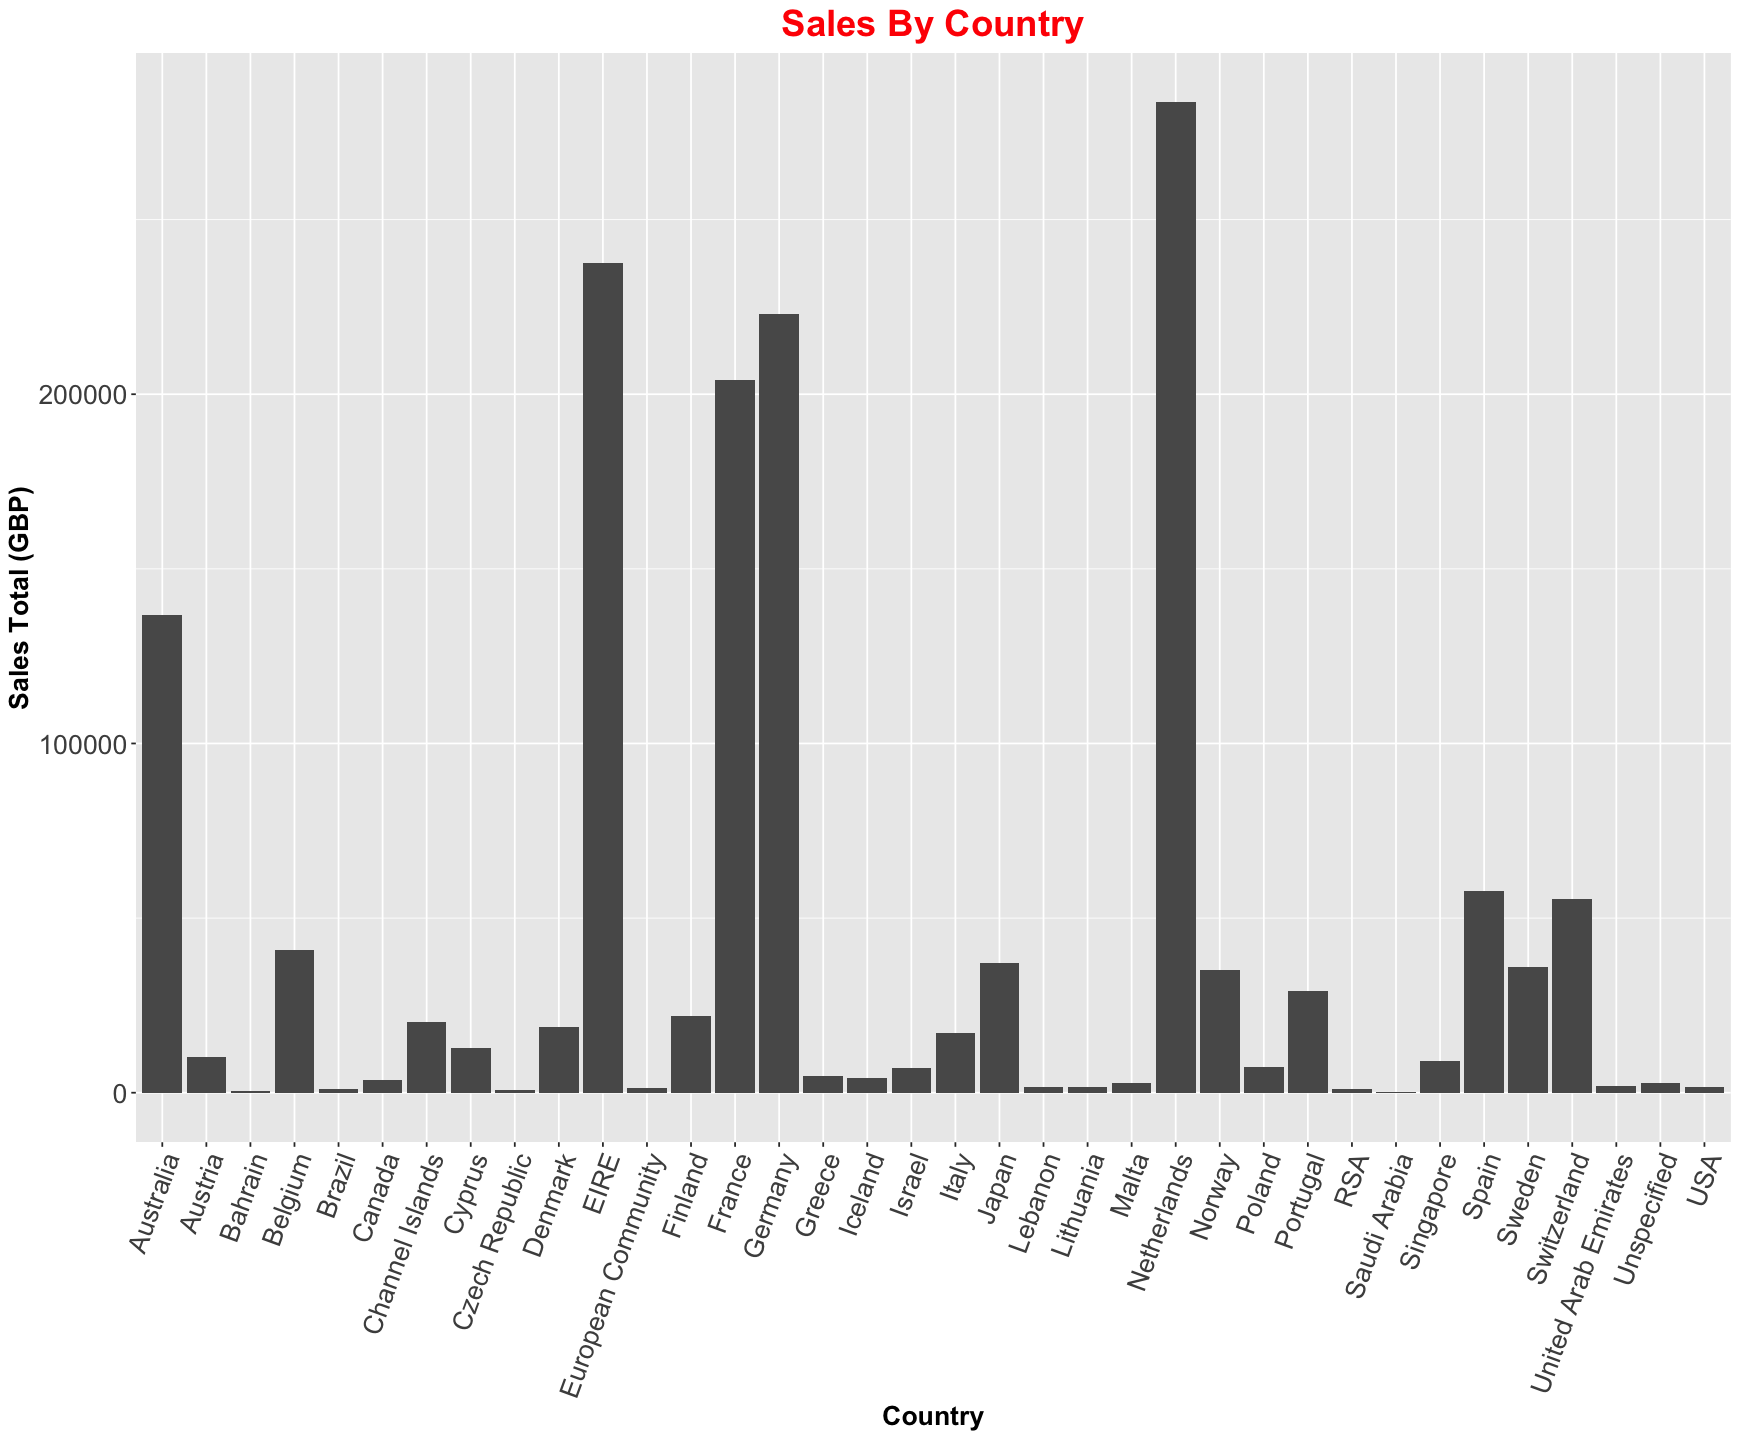

In [99]:
ggplot(country_sales_aggr, aes(x=Category, y=x))+ 

  geom_bar(stat = "identity")+xlab('Country')+

 ylab('Sales Total (GBP)')+

labs(title="Sales By Country")+
theme(
  plot.title = element_text(color = "red", size = 22, face = "bold",hjust = .5),
  plot.subtitle = element_text(color = "blue",size=16,hjust=.5)) +

theme(axis.text=element_text(size=16),
        axis.title=element_text(size=16,face="bold")) +

theme(axis.text.x = element_text(angle = 70, hjust = 1))

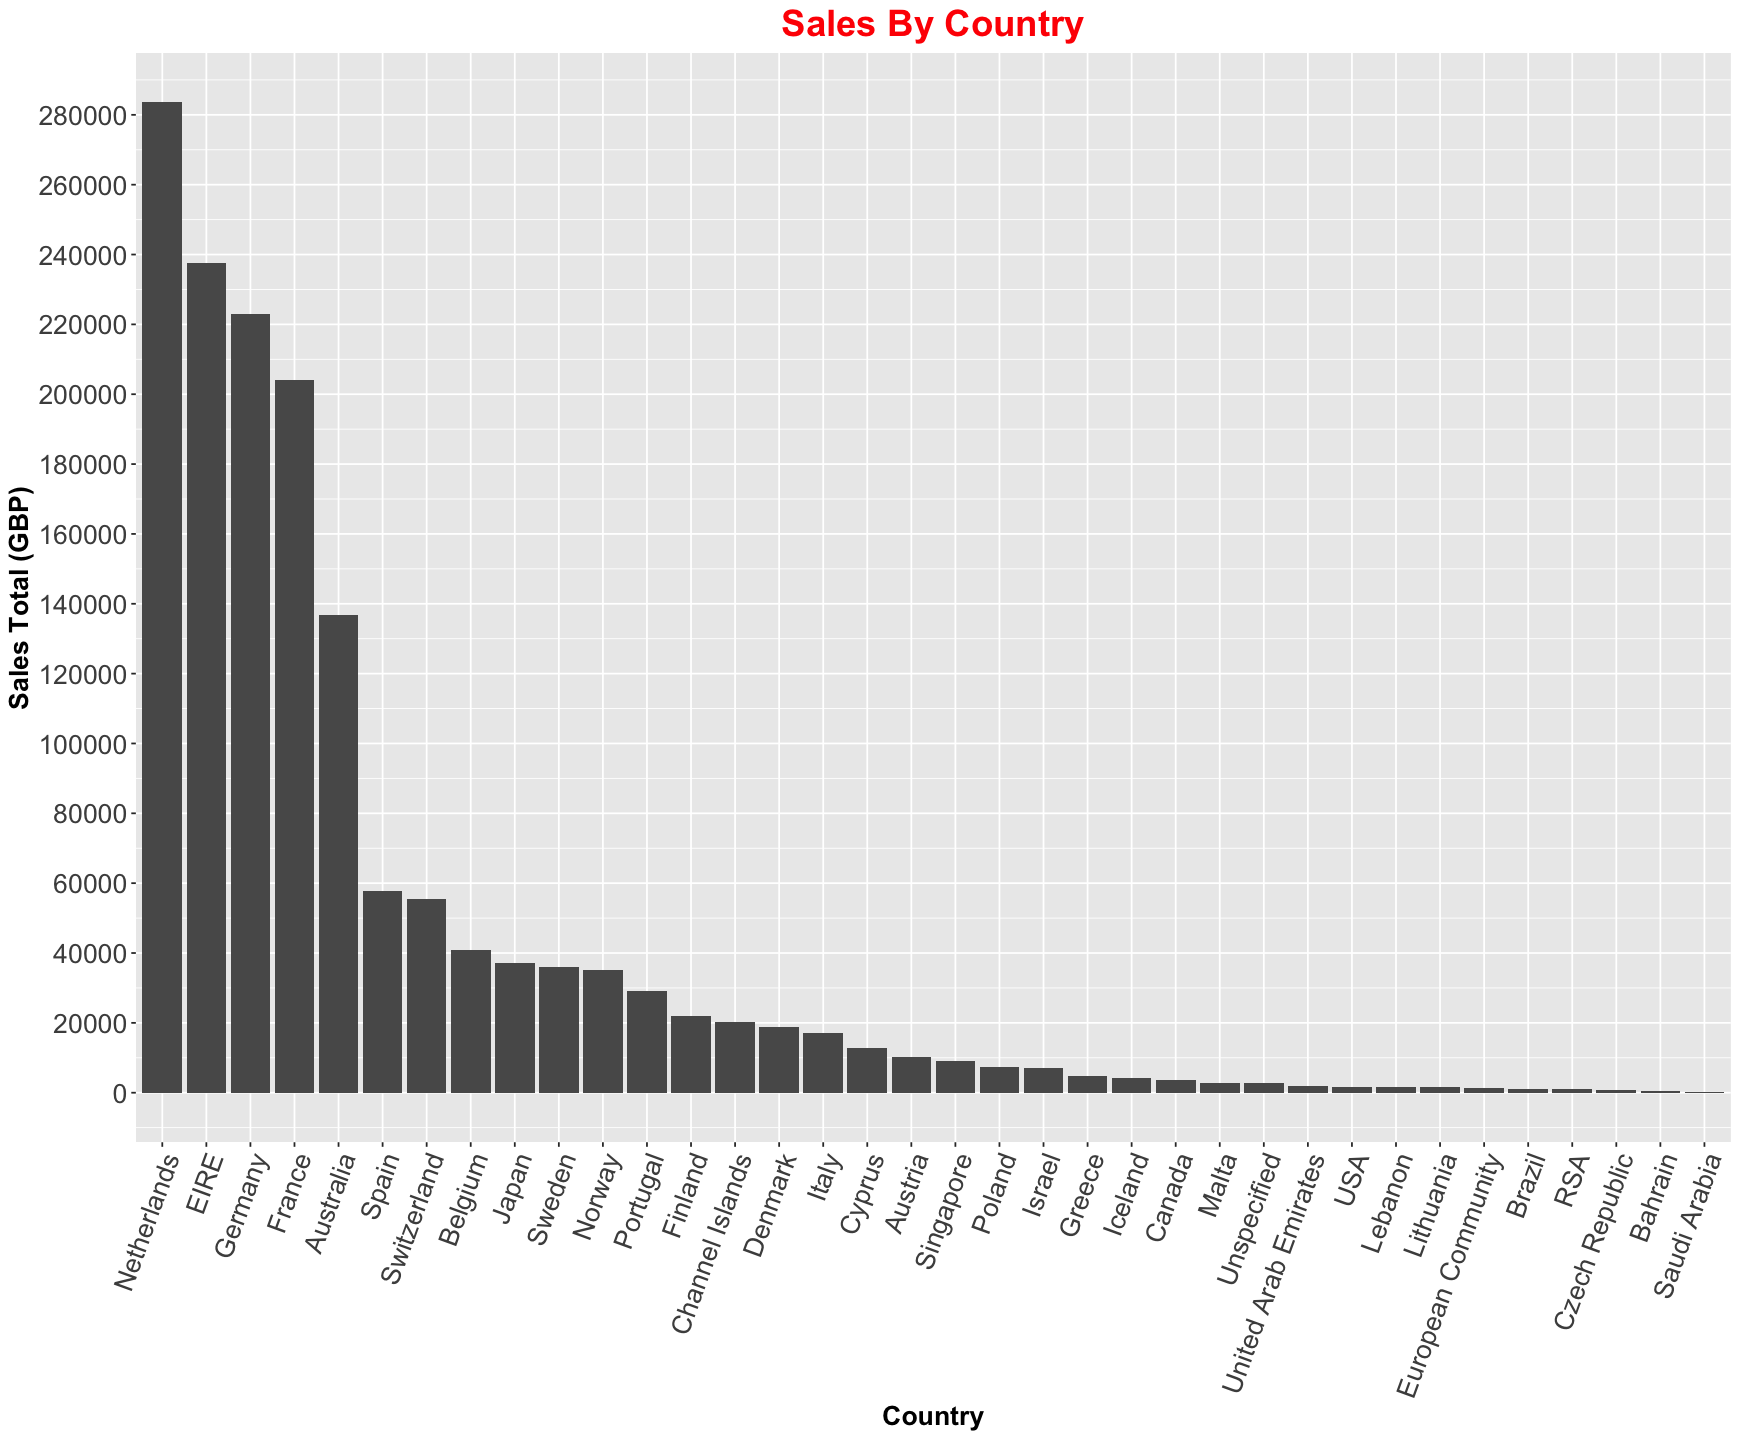

In [112]:
# How about order the Bar chart: high-low instead of alphabetical order:
ggplot(country_sales_aggr, aes(x = reorder(Category, -x), y = x))+ 
       geom_bar(stat = "identity") +

# setup bar chart
geom_bar(stat = "identity")+

#Change label names
xlab('Country')+ylab('Sales Total (GBP)')+

# Title
labs(title="Sales By Country")+

# Adjust position, size and color of title and subtitle
theme(
  plot.title = element_text(color = "red", size = 22, face = "bold",hjust = .5),
  plot.subtitle = element_text(color = "blue",size=16,hjust=.5)) +

# Increase Axis text size
theme(axis.text=element_text(size=16),
        axis.title=element_text(size=16,face="bold")) +

# Change axis tick angle
theme(axis.text.x = element_text(angle = 70, hjust = 1))  +

#scale y-axis:
scale_y_continuous(breaks=seq(0, 300000, 20000))

`--------------------------------------`

# <font color=red>LIKE</font> , Share &

# <font color=red>SUB</font>scribe

# Citations & Help:

# ◔̯◔

http://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html

https://stackoverflow.com/questions/45473128/r-changing-ggplot-plot-size-in-jupyter

https://www.datanovia.com/en/blog/ggplot-axis-ticks-set-and-rotate-text-labels/

https://www.datanovia.com/en/blog/ggplot-title-subtitle-and-caption/

https://medium.com/idinsight-blog/how-to-make-bar-graphs-using-ggplot2-in-r-9812905df5d2